# MaxCut

## Problem Definition

The MaxCut problem is defined as follows:

Given a graph $G=(V,E)$, find a subset $S\subset V$ such that the number of edgest between $S$ and $S/V$ is the largest.

First we import the necessary functions and packages, create a graph G we will be cutting, define a quantum argument qarg we’ll be acting on, as well as specify the depth of our algorithm.

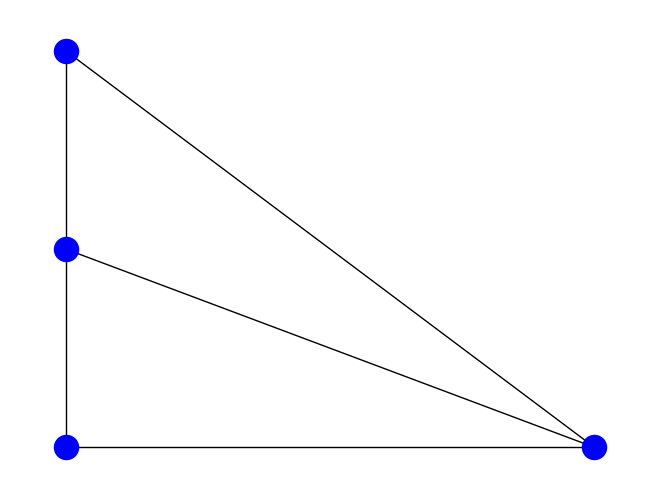

In [1]:
from qrisp.qaoa import QAOAProblem, maxcut_obj,create_maxcut_cl_cost_function,create_maxcut_cost_operator, RX_mixer
from qrisp import QuantumArray, QuantumVariable
import networkx as nx
from operator import itemgetter

G = nx.Graph()
G.add_edges_from([[0, 1], [1, 2], [1, 3],[0,3], [2,3]])
#G.add_edges_from([[0,3],[0,4],[1,3],[1,4],[2,3],[2,4]])

qarg = QuantumArray(qtype = QuantumVariable(1), shape = len(G))
color = 'b'
depth = 4
nx.draw(G,node_color = color, pos=nx.bipartite_layout(G, [0,1,2]))

## QAOA instanciation
Next we follow the recipe to run the algorithm with QAOAProblem, feeding it the cost_operator, a mixer and a cl_cost_function.

In [2]:
import time
maxcut_instance = QAOAProblem(create_maxcut_cost_operator(G), RX_mixer, create_maxcut_cl_cost_function(G))

start_time = time.time()
res = maxcut_instance.run(qarg, depth, max_iter = 50)
print(time.time()-start_time)

2.078247308731079                                                                    


## Result analysis
After running our QAOA on the MaxCut problem instance we can now obtain the QAOA solution and draw the graph with optimally colored nodes.

Best string: ['0' '1' '0' '1'] with cut: 4
QAOA solution:  ['0' '1' '0' '1']


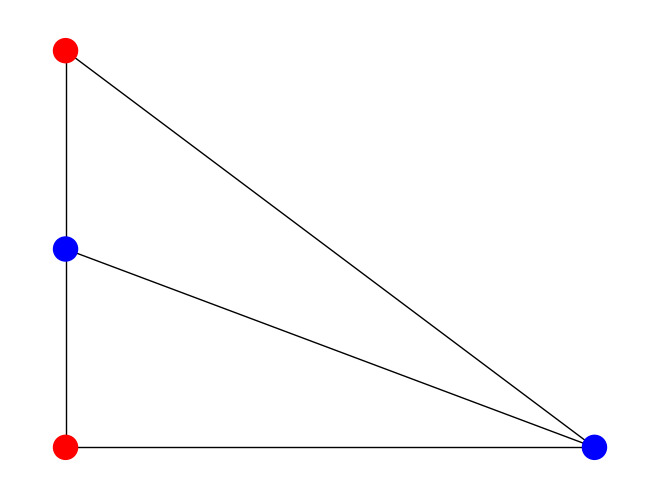

In [3]:
best_cut, best_solution = min([(maxcut_obj(x,G),x) for x in res.keys()], key=itemgetter(0))
print(f"Best string: {best_solution} with cut: {-best_cut}")

res_str = list(res.keys())[0]
print("QAOA solution: ", res_str)
best_cut, best_solution = (maxcut_obj(res_str,G),res_str)

colors = ['r' if best_solution[node] == '0' else 'b' for node in G]
nx.draw(G,node_color = colors, pos=nx.bipartite_layout(G, [0,1,2]))